### 1.1 Clasificacion

In [97]:
import tensorflow as tf
import pandas as pd

In [98]:
data_xor = pd.DataFrame(data={
  'A': [-1,1,-1,1],
  'B': [-1,-1,1,1],
  'XOR': [0,1,1,0],
})

data_xor

,A,B,XOR
0,-1,-1,0
1,1,-1,1
2,-1,1,1
3,1,1,0


In [99]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 4)                 12        
                                                                 
 dense_56 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [100]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=data_xor[['A','B']], y=data_xor['XOR'], batch_size = 4, epochs=2000, callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 0s 405ms/step - loss: 0.7025 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6998 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5000
Epoch 11/2000
1

In [117]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 4)                 12        
                                                                 
 dense_64 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [118]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 1),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=data_xor[['A','B']], y=data_xor['XOR'], batch_size = 4, epochs=2000, callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 0s 245ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6897 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6890 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6868 - accuracy: 0.5000
Epoch 11/2000
1

### 1.2 Regresion

In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
x = np.linspace(0, 2*np.pi, 20)
y = np.linspace(0, 2*np.pi, 20)
z = np.linspace(0, 1, 20)

values = np.array(np.meshgrid(x,y,z)).T.reshape(-1,3)
values

array([[0.        , 0.        , 0.        ],
       [0.        , 0.33069396, 0.        ],
       [0.        , 0.66138793, 0.        ],
       ...,
       [6.28318531, 5.62179738, 1.        ],
       [6.28318531, 5.95249134, 1.        ],
       [6.28318531, 6.28318531, 1.        ]])

In [3]:
def f(x,y,z):
  return np.sin(x) + np.cos(y) + z

In [4]:
result = f(values[:,0], values[:,1], values[:,2])
result

array([1.        , 0.94581724, 0.78914051, ..., 1.78914051, 1.94581724,
       2.        ])

In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=3, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01),loss=tf.keras.losses.MeanSquaredError())
hist = model.fit(x=values, y=result, batch_size = 32, epochs=200)

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 0.7125
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4816
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4220
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3689
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3276
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2947
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2693
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2473
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2325
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2168
Epoch 11/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2075
Epoch 12/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2007
Epoch 13/200


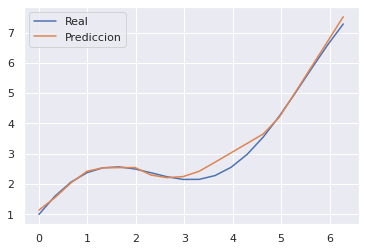

In [49]:
f_evaluada_en_x_real = f(x,x,x)
f_evaluada_en_x_pred = model.predict(np.c_[x,x,x])


plt.plot(x, f_evaluada_en_x_real, label="Real")
plt.plot(x, f_evaluada_en_x_pred, label="Prediccion")
plt.legend(loc="upper left")

plt.show()

In [53]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=3, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                256       
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1),loss=tf.keras.losses.MeanSquaredError())
hist = model.fit(x=values, y=result, batch_size = 32, epochs=200)

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 1.5197
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4871
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3491
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2868
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2608
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2435
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2085
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2059
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1845
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1742
Epoch 11/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1661
Epoch 12/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1647
Epoch 13/200


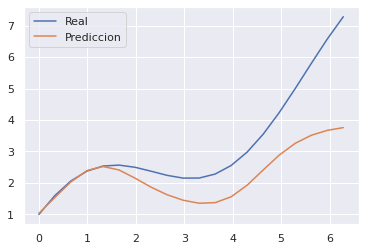

In [55]:
f_evaluada_en_x_real = f(x,x,x)
f_evaluada_en_x_pred = model.predict(np.c_[x,x,x])


plt.plot(x, f_evaluada_en_x_real, label="Real")
plt.plot(x, f_evaluada_en_x_pred, label="Prediccion")
plt.legend(loc="upper left")

plt.show()